In [1]:
import matplotlib.pyplot as plt  #Importing Modules
from matplotlib import style
style.use('ggplot')
import pandas as pd
import numpy as np
import math
import random 

In [2]:
df=pd.read_csv("twofeature.txt", sep=' ',
                  names = ["Label", "x1", "x2"])
x1=[]
x2=[]
y1=[]
y2=[]
z1=[]
z2=[]
arr=[] 
for i in range(len(df["x1"])):           #Extracting the Data. Putting x features in z1 and y labels in z2.
    arr.append(0)                                     # x1,x2 are the feauture points whrn y=+1
    if int(df["Label"][i])==1:              # y1,y2 are the feauture points whrn y=-1
        s=[]
        q=str(df["x2"][i])
        k=str(df["x1"][i])
        x1.append(float(k[2:len(k)]))
        x2.append(float(q[2:len(q)]))
        s.append(float(k[2:len(k)]))
        s.append(float(q[2:len(q)]))
        z1.append(s)
        z2.append(1)
    else:
        s=[]
        q=str(df["x2"][i])
        k=str(df["x1"][i])
        y1.append(float(k[2:len(k)]))
        y2.append(float(q[2:len(q)]))
        s.append(float(k[2:len(k)]))
        s.append(float(q[2:len(q)]))
        z1.append(s)
        z2.append(-1)

In [3]:
def kernel(k1,k2):#Kernel Function
    return np.dot(k1,k2) 


In [4]:
def svm_algorithm(x,x_test,y,a,b): #SVM algorithm
    c=0                           
    for i in range(len(y)):
        c+=(a[i]*y[i]*kernel(x[i],x_test))
    return (c+b)

In [5]:
def maxandmin(y1,y2,a1,a2,c):  #To find L and H
    if y1!=y2:
        k=[max(0,a2-a1),min(c,c+a2-a1)]
    else:
        k=[max(0,a2+a1-c),min(c,a2+a1)]
    return k


In [6]:
def smo_optimization(x,y,arr,bias,c,maxpass,tol=0.001): #Solving SVM using SMO algorithm
    a=arr
    b=bias
    iter=0
    while (iter<maxpass):
        numalphas=0
        z=len(y)
        for i in range(z):
            s=svm_algorithm(x,x[i],y,a,b)-y[i]
            if ((y[i]*s < -tol and a[i]<c) or (y[i]*s >tol and a[i]>0)):
                k=random.randint(0,z-1)
                t=svm_algorithm(x,x[k],y,a,b)-y[k]
                ai_old=a[i]
                ak_old=a[k]
                d=maxandmin(y[i],y[k],a[i],a[k],c)
                if (d[0]==d[1]):
                    continue
                neta=(2*kernel(x[i],x[k]))-kernel(x[i],x[i])-kernel(x[k],x[k])
                if neta>=0:
                    continue
                a[k]=a[k]-((y[k]*(s-t))/neta)
                if (a[k]>d[1]):
                    a[k]=d[1]
                elif (a[k]<d[0]):
                    a[k]=d[0]
                else:
                    a[k]=a[k]
                if abs(a[k]-ak_old)<0.00001:
                    continue
                a[i]=a[i]-(y[i]*y[k]*(a[k]-ak_old))
                b1=b-s-(y[i]*(a[i]-ai_old)*kernel(x[i],x[i]))-(y[k]*(a[k]-ak_old)*kernel(x[i],x[k]))
                b2=b-t-(y[i]*(a[i]-ai_old)*kernel(x[i],x[k]))-(y[k]*(a[k]-ak_old)*kernel(x[k],x[k]))
                if (a[i]>0 and a[i]<c):
                    b=b1
                elif (a[k]>0 and a[k]<c):
                    b=b2
                else:
                    b=(b1+b2)/2.0
                numalphas+=1
            if numalphas==0:
                iter+=1
            else:
                iter=0
    return ([a,b])

The Accuracy of the Support Vector Machine is 98.0392156862745 %


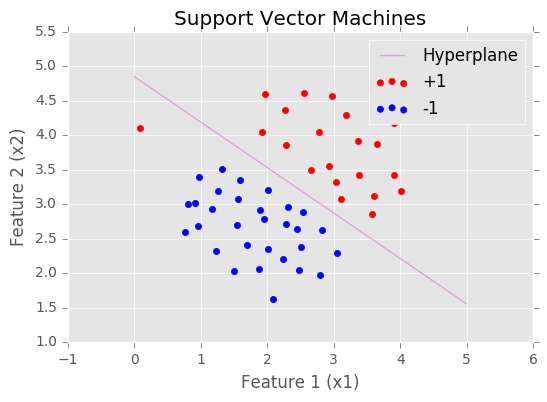

In [7]:
#Running the algorithm with C=1
sumo=smo_optimization(z1,z2,arr,0,1,1000)
accuracy=0
ks=[]
for i in range(len(z2)):
    ts= svm_algorithm(z1,z1[i],z2,sumo[0],sumo[1])
    if ts>0:
        ks.append(1)
    else:
        ks.append(-1)
for i in range(len(z2)):
    if (ks[i]==z2[i]):
        accuracy+=1
print ("The Accuracy of the Support Vector Machine is",(accuracy/len(z2)*100),'%')
w0=0
w1=0
for i in range(len(z1)):
    w0+=sumo[0][i]*z2[i]*z1[i][0]
    w1+=sumo[0][i]*z2[i]*z1[i][1]
a=-w0/w1
xx = np.linspace(0,5)
yy = (a*xx) -(sumo[1]/w1)
plt.plot(xx,yy,'k-',color='plum',label='Hyperplane')
plt.scatter(x1,x2,color='r',label='+1')
plt.scatter(y1,y2,color='b',label='-1')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Support Vector Machines')
plt.legend()
plt.show()

The Accuracy of the Support Vector Machine is 100.0 %


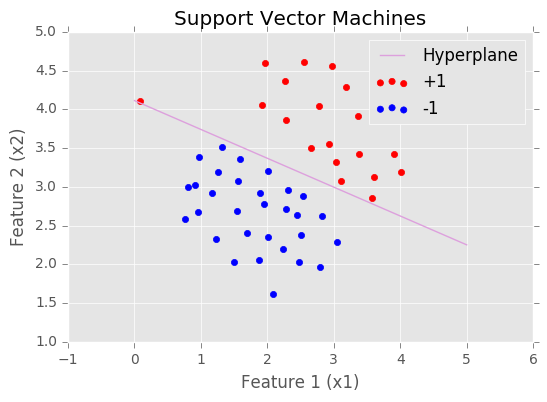

In [8]:
#Running the algorithm with C=100
sumo=smo_optimization(z1,z2,arr,0,100,1000)
accuracy=0
ks=[]
for i in range(len(z2)):
    ts= svm_algorithm(z1,z1[i],z2,sumo[0],sumo[1])
    if ts>0:
        ks.append(1)
    else:
        ks.append(-1)
for i in range(len(z2)):
    if (ks[i]==z2[i]):
        accuracy+=1
print ("The Accuracy of the Support Vector Machine is",(accuracy/len(z2)*100),'%')
w0=0
w1=0
for i in range(len(z1)):
    w0+=sumo[0][i]*z2[i]*z1[i][0]
    w1+=sumo[0][i]*z2[i]*z1[i][1]
a=-w0/w1
xx = np.linspace(0,5)
yy = (a*xx) -(sumo[1]/w1)
plt.plot(xx,yy,'k-',color='plum',label='Hyperplane')
plt.scatter(x1,x2,color='r',label='+1')
plt.scatter(y1,y2,color='b',label='-1')
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Support Vector Machines')
plt.legend()
plt.show()
